<h1 style="text-align:center">Example 4.2</h1>
<h3 style="text-align:center">MCHE 513: Intermediate Dynamics &mdash; Fall 2015</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In [1]:
import sympy
sympy.init_printing()

In [2]:
beta, gamma, phi = sympy.symbols('beta gamma phi')

In [3]:
# Define the precession rotation matrix
R_beta = sympy.Matrix([[sympy.cos(beta), 0, -sympy.sin(beta)],
                       [0, 1, 0],
                       [sympy.sin(beta), 0, sympy.cos(beta)]])

In [4]:
# Define the nutation rotation matrix
R_gamma = sympy.Matrix([[1, 0, 0],
                        [0, sympy.cos(gamma), sympy.sin(gamma)],
                        [0, -sympy.sin(gamma), sympy.cos(gamma)]])

In [5]:
# Define the sping rotation matrix
R_phi = sympy.Matrix([[sympy.cos(phi), 0, -sympy.sin(phi)],
                      [0, 1, 0],
                      [sympy.sin(phi), 0, sympy.cos(phi)]])

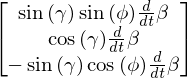

In [6]:
# Write the precession term in XYZ, then use the rotation matrices to transform to xyz
precession_vel = sympy.Matrix([[0], [sympy.Derivative(beta, sympy.Symbol('t'))], [0]])

precession_term = R_phi * R_gamma * R_phi * precession_vel

# Print the answer - not using the print() function causes it to default to "pretty" printing
precession_term

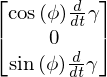

In [7]:
# Write the precession term in x'y'z', then use the rotation matrices to transform to xyz
nutation_vel = sympy.Matrix([[sympy.Derivative(gamma, sympy.Symbol('t'))], [0], [0]])

nutation_term = R_phi * R_gamma * nutation_vel

# Print the answer - not using the print() function causes it to default to "pretty" printing
nutation_term

In [8]:
# The spin component of the angular velocity is already written in xyz
# No transformation is needed
spin_vel = sympy.Matrix([[0], [sympy.Derivative(phi, sympy.Symbol('t'))], [0]])

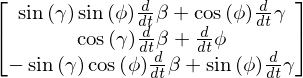

In [9]:
# The total angular velocity is just the sum of the precsesion, nutation, and spin terms
ang_vel_xyz = precession_term + nutation_term + spin_vel

# Print the answer - not using the print() function causes it to default to "pretty" printing
ang_vel_xyz

We can subtitute the values for the angles using the ```.subs()``` method.

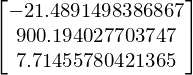

In [10]:
ang_vel_xyz.subs([(sympy.Derivative(beta, sympy.Symbol('t')), 63.54),
                  (sympy.Derivative(gamma, sympy.Symbol('t')), 19.416),
                  (sympy.Derivative(phi, sympy.Symbol('t')), 837.8), 
                  (beta, 0.2939), 
                  (gamma,0.19021), 
                  (phi, 3.351)])

This is currently written in the $xyz$ frame. Using the rotation matrices developed, we can easily transform it into the $XYZ$ frame.

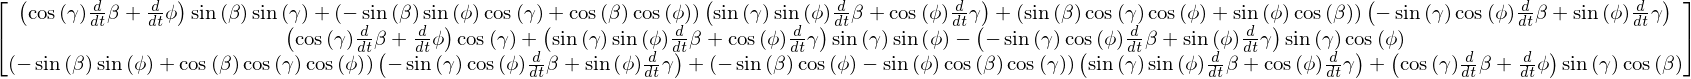

In [11]:
R = R_phi * R_gamma * R_beta

ang_vel_XYZ = R.T * ang_vel_xyz

# Print the answer - not using the print() function causes it to default to "pretty" printing
ang_vel_XYZ

The ```.subs()``` method can also be used here to get a numerical answer.

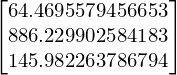

In [12]:
ang_vel_XYZ.subs([(sympy.Derivative(beta, sympy.Symbol('t')), 63.54),
                  (sympy.Derivative(gamma, sympy.Symbol('t')), 19.416),
                  (sympy.Derivative(phi, sympy.Symbol('t')), 837.8), 
                  (beta, 0.2939), 
                  (gamma,0.19021), 
                  (phi, 3.351)])

A similar procedure can be used to find the angular acceleration.

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))